## AOD analysis

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import logging
#import esmvalcore.preprocessor
import xarray as xr
from xmip.preprocessing import rename_cmip6
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cftime
import matplotlib
import seaborn as sns
matplotlib.rcParams.update({'font.size': 15})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_ds(run, var):
    path = '/gws/nopw/j04/moghli/postprocessed_ncs/{r}/{v}/'.format(r=run, v=var)
    ds_list = []
    for file in os.listdir(path):
        ds_list.append(xr.open_dataset(path+file))
    ds = xr.concat(ds_list, dim='time').sortby('time')
    return ds


In [3]:
run_dict = {'u-dg683':[30.625, 12.3],
            'u-df777':[30.625, 12.9],
            'u-de348':[30.625, 14.1],
            'u-de517':[30.625, 15.4],
            'u-de349':[30.625, 16.0],
            'u-de350':[30.625, 18.0],
            'u-de365':[30.625, 20.2],
            'u-de110':[40.625, 12.3],
            'u-de636':[40.625, 12.9],
            'u-de111':[40.625, 14.1],
            'u-de505':[40.625, 15.4],
            'u-de145':[40.625, 16.0],
            'u-de187':[40.625, 18.0],
            'u-de369':[40.625, 20.2],
            'u-dd987':[50.625, 12.3],
            'u-de593':[50.625, 12.9],
            'u-dd989':[50.625, 14.1],
            'u-de506':[50.625, 15.4],
            'u-de012':[50.625, 16.0],
            'u-de013':[50.625, 18.0],
            'u-de399':[50.625, 20.2],
            'u-de018':[60.625, 12.3],
            'u-de567':[60.625, 12.9],
            'u-de026':[60.625, 14.1],
            'u-de633':[60.625, 15.4],
            'u-de050':[60.625, 16.0],
            'u-de052':[60.625, 18.0],
            'u-de457':[60.625, 20.2],
            'u-dg027':[70.625, 12.3],
            'u-df710':[70.625, 12.9],
            'u-dg309':[70.625, 14.1],
            'u-dg028':[70.625, 15.4],
            'u-dg549':[70.625, 16.0],
            'u-dg552':[70.625, 18.0],
            'u-dg655':[70.625, 20.2]
            }

In [4]:
ds_list = []
run_list = []
for run in run_dict.keys():
    #print(run)
    run_list.append(run)
    ds = get_ds(run, 'AOD')
    ds['injection_latitude'] = run_dict[run][0]
    ds['injection_altitude'] = run_dict[run][1]
    ds_list.append(ds.mean(dim=['longitude', 'time']))
ds_dict = dict(zip(run_list, ds_list))

In [5]:
# get ssp245 baseline aod:
path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/AERmon/od550aer/gn/latest/'
aod_ssp245_r1 = rename_cmip6(xr.open_mfdataset(path+'*.nc')).sel(time='2036')
aod_ssp245_r1 = aod_ssp245_r1.mean(dim=['x']).rename({'y':'latitude'})
weights = np.cos(np.deg2rad(aod_ssp245_r1['latitude']))
aod_ssp245_r1_ts = aod_ssp245_r1.weighted(weights).mean(dim='latitude')

# get ssp245 baseline saod:
path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/Emon/od550aerso/gn/latest/'
saod_ssp245_r1 = rename_cmip6(xr.open_mfdataset(path+'*.nc')).sel(time='2036')
saod_ssp245_r1 = saod_ssp245_r1.mean(dim=['x']).rename({'y':'latitude'})
weights = np.cos(np.deg2rad(saod_ssp245_r1['latitude']))
saod_ssp245_r1_ts = saod_ssp245_r1.weighted(weights).mean(dim='latitude')

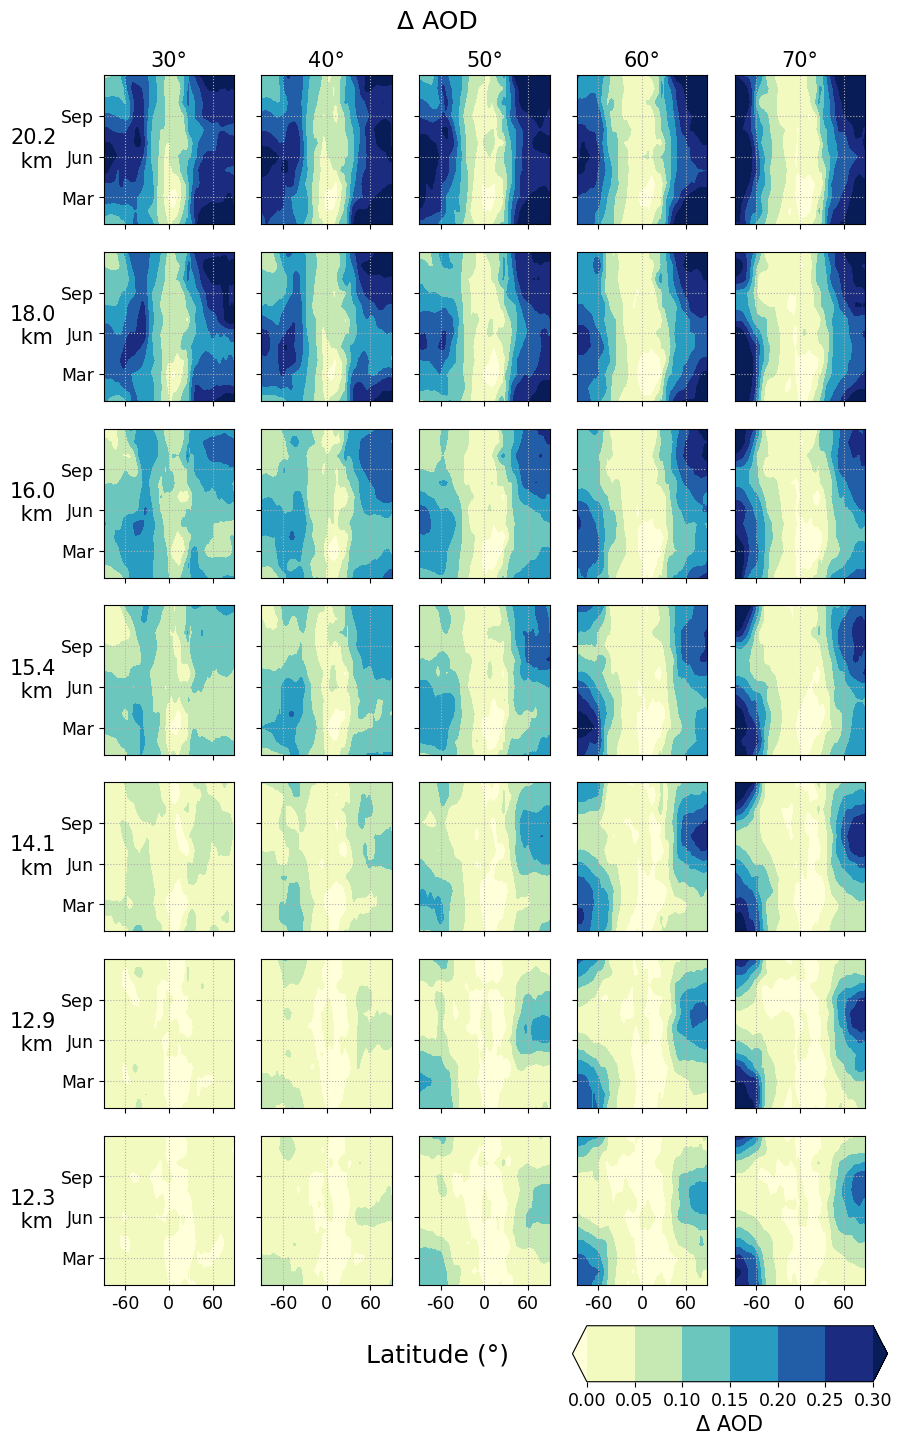

In [6]:
### repeat the above plot but for annual injection:

## new run_dict just changes the order for nice plotting
run_dict = {'u-de365':[30.625, 20.2],'u-de369':[40.625, 20.2],'u-de399':[50.625, 20.2],'u-de457':[60.625, 20.2],'u-dg655':[70.625, 20.2],
            'u-de350':[30.625, 18.0],'u-de187':[40.625, 18.0],'u-de013':[50.625, 18.0],'u-de052':[60.625, 18.0],'u-dg552':[70.625, 18.0],
            'u-de349':[30.625, 16.0],'u-de145':[40.625, 16.0],'u-de012':[50.625, 16.0],'u-de050':[60.625, 16.0],'u-dg549':[70.625, 16.0],  
            'u-de517':[30.625, 15.4],'u-de505':[40.625, 15.4],'u-de506':[50.625, 15.4],'u-de633':[60.625, 15.4],'u-dg028':[70.625, 15.4],
            'u-de348':[30.625, 14.1],'u-de111':[40.625, 14.1],'u-dd989':[50.625, 14.1],'u-de026':[60.625, 14.1],'u-dg309':[70.625, 14.1],
            'u-df777':[30.625, 12.9],'u-de636':[40.625, 12.9],'u-de593':[50.625, 12.9],'u-de567':[60.625, 12.9],'u-df710':[70.625, 12.9],
            'u-dg683':[30.625, 12.3],'u-de110':[40.625, 12.3],'u-dd987':[50.625, 12.3],'u-de018':[60.625, 12.3], 'u-dg027':[70.625, 12.3],
           }

fig, axs = plt.subplots(7, 5, figsize=(9, 14),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', rotation=0, labelpad = 20)
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), fontsize='medium')
    
    ## temporary hack to make plot layout work with dummies until i have the full set of sims:
    if 'Dummy' in run:
        #ax.remove()
        pass
    
    else:
        
        ds = get_ds(run, 'AOD').mean('longitude')
        #cf = ds.Total_sAOD.plot(ax=ax, levels = ,
        #                   extend='max', add_colorbar=False)
        cs=ax.contourf(ds.latitude.values, ds.time.dt.month.values, 
                       ds.Total_AOD.values - aod_ssp245_r1.od550aer.values,
                       levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                       cmap='YlGnBu',
                       extend='both')
        
        
        ax.set_xticks([-60, 0, 60])
        ax.set_xticklabels(['-60', '0', '60'], fontsize='small')
        ax.set_yticks([3, 6, 9])
        ax.set_yticklabels(['Mar', 'Jun', 'Sep'], fontsize='small')
        ax.grid(ls='dotted')
    i=i+1
fig.supxlabel('Latitude (°)')
plt.suptitle('\u0394 AOD')
plt.tight_layout()
cbar_ax = fig.add_axes([0.65, 0, 0.35, 0.04])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', label='\u0394 AOD')
cbar.ax.tick_params(labelsize='small')
plt.savefig('Figures/Main/Zonal_seasonal_delta_AOD_all_runs_v3.jpg', dpi=450, bbox_inches='tight')
plt.show()

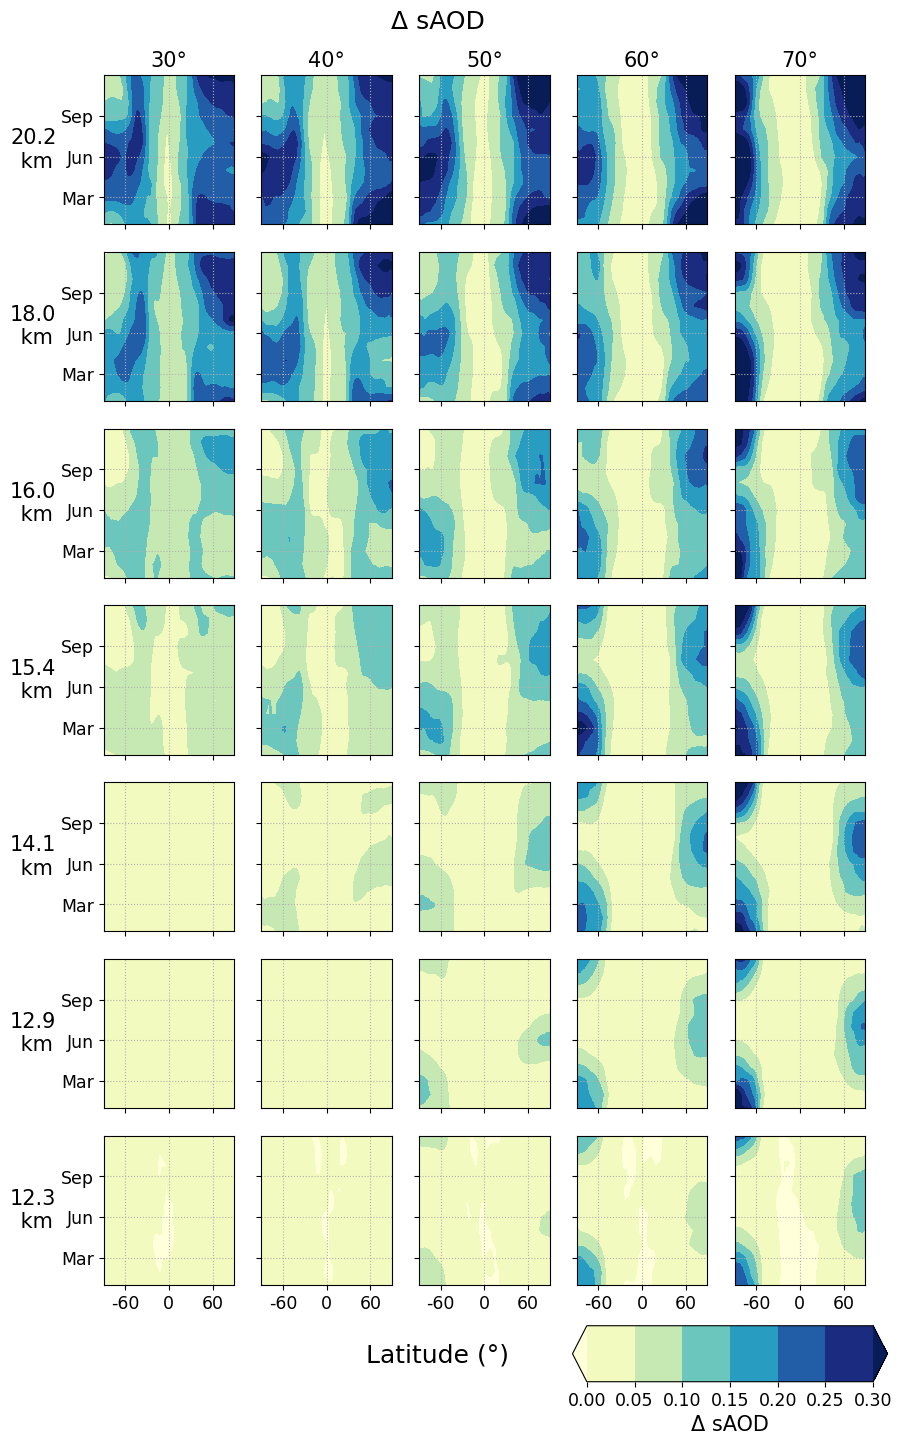

In [7]:
### repeat the above plot but for stratospheric aod only

fig, axs = plt.subplots(7, 5, figsize=(9, 14),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', rotation=0, labelpad = 20)
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), fontsize='medium')
    
    ## temporary hack to make plot layout work with dummies until i have the full set of sims:
    if 'Dummy' in run:
        #ax.remove()
        pass
    
    else:
        
        ds = get_ds(run, 'AOD').mean('longitude')
        #cf = ds.Total_sAOD.plot(ax=ax, levels = ,
        #                   extend='max', add_colorbar=False)
        cs=ax.contourf(ds.latitude.values, ds.time.dt.month.values, 
                       ds.Total_sAOD.values - saod_ssp245_r1.od550aerso.values,
                       levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                       cmap='YlGnBu',
                       extend='both')
        
        
        ax.set_xticks([-60, 0, 60])
        ax.set_xticklabels(['-60', '0', '60'], fontsize='small')
        ax.set_yticks([3, 6, 9])
        ax.set_yticklabels(['Mar', 'Jun', 'Sep'], fontsize='small')
        ax.grid(ls='dotted')
    i=i+1
fig.supxlabel('Latitude (°)')
plt.suptitle('\u0394 sAOD')
plt.tight_layout()
cbar_ax = fig.add_axes([0.65, 0, 0.35, 0.04])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', label='\u0394 sAOD')
cbar.ax.tick_params(labelsize='small')
plt.savefig('Figures/Extra/Zonal_seasonal_delta_sAOD_all_runs_v3.jpg', dpi=450, bbox_inches='tight')
plt.show()

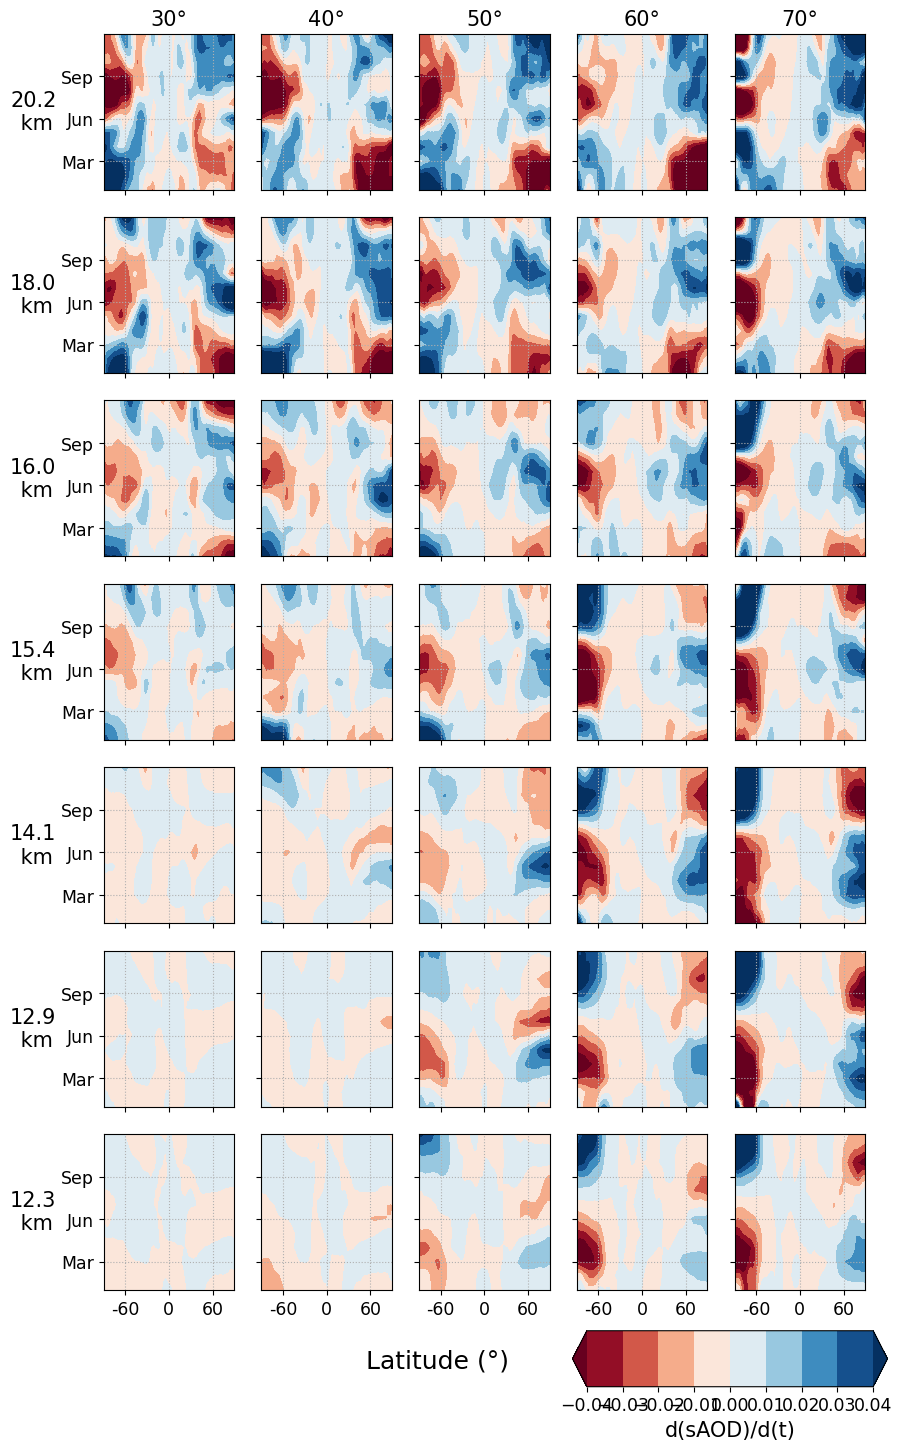

In [8]:
## also plot the rate of change:
fig, axs = plt.subplots(7, 5, figsize=(9, 14),
                        sharex='all', sharey='all')

i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    height = run_dict[run][1]
    if run_dict[run][0]==30.625:
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', rotation=0, labelpad = 20)
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), fontsize='medium')
    
    ## temporary hack to make plot layout work with dummies until i have the full set of sims:
    if 'Dummy' in run:
        #ax.remove()
        pass
    
    else:
        
        ds = get_ds(run, 'AOD').mean('longitude')
        ds 
        #cf = ds.Total_sAOD.plot(ax=ax, levels = ,
        #                   extend='max', add_colorbar=False)
        # NB xaray won't accept 'M' as a datetime_unit so we multiply the {change per day} by 30 to get a monthly value. 
        cs=ax.contourf(ds.latitude.values, ds.time.dt.month.values, 30*ds.Total_sAOD.differentiate('time', datetime_unit='D').values,
                       levels = [-0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04],
                       #levels = [-0.04, -0.02, 0, 0.02, 0.04],
                       cmap='RdBu',
                       extend='both')
        
        ax.set_xticks([-60, 0, 60])
        ax.set_xticklabels(['-60', '0', '60'], fontsize='small')
        ax.set_yticks([3, 6, 9])
        ax.set_yticklabels(['Mar', 'Jun', 'Sep'], fontsize='small')
        ax.grid(ls='dotted')
    i=i+1
fig.supxlabel('Latitude (°)')
plt.tight_layout()
cbar_ax = fig.add_axes([0.65, 0, 0.35, 0.04])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', label='d(sAOD)/d(t)')
cbar.ax.tick_params(labelsize='small')

plt.savefig('Figures/Extra/Zonal_seasonal_dAOD_dt_all_runs_v2.jpg', dpi=450, bbox_inches='tight')
plt.show()

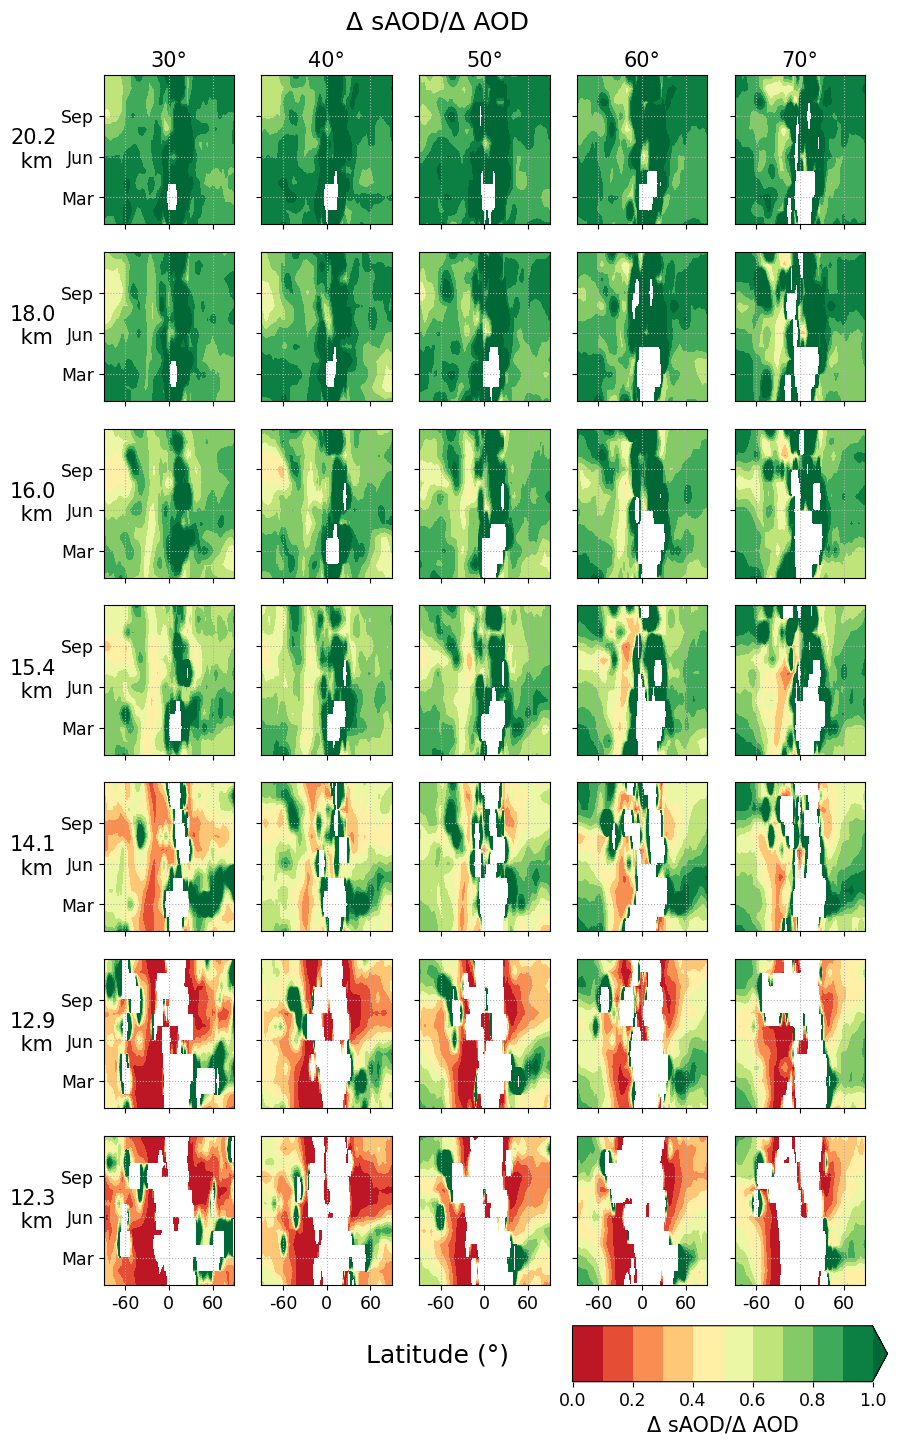

In [9]:
### show proportion in the stratosphere:


fig, axs = plt.subplots(7, 5, figsize=(9, 14),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', rotation=0, labelpad = 20)
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), fontsize='medium')
    
    ## temporary hack to make plot layout work with dummies until i have the full set of sims:
    if 'Dummy' in run:
        #ax.remove()
        pass
    
    else:
        
        ds = get_ds(run, 'AOD').mean('longitude')
        delta_total = (ds.Total_AOD - aod_ssp245_r1.od550aer).compute()
        delta_strat = (ds.Total_sAOD - saod_ssp245_r1.od550aerso).compute()
        ratio = (delta_strat/delta_total).compute()
        #ratio = ratio.where(delta_strat>0, drop=True)
        ratio = ratio.where(delta_total>0, drop=True)
        
        #cf = ds.Total_sAOD.plot(ax=ax, levels = ,
        #                   extend='max', add_colorbar=False)
        cs=ax.contourf(ratio.latitude.values, ratio.time.dt.month.values, 
                       ratio,
                       levels = np.arange(0, 1.1, 0.1),
                       cmap='RdYlGn',
                       extend='max')
        
        
        ax.set_xticks([-60, 0, 60])
        ax.set_xticklabels(['-60', '0', '60'], fontsize='small')
        ax.set_yticks([3, 6, 9])
        ax.set_yticklabels(['Mar', 'Jun', 'Sep'], fontsize='small')
        ax.grid(ls='dotted')
    i=i+1
fig.supxlabel('Latitude (°)')
plt.suptitle('\u0394 sAOD/\u0394 AOD')
plt.tight_layout()
cbar_ax = fig.add_axes([0.65, 0, 0.35, 0.04])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', label='\u0394 sAOD/\u0394 AOD')
cbar.ax.tick_params(labelsize='small')
plt.savefig('Figures/Extra/Zonal_seasonal_fracAOD_stratospheric_all_runs_v3.jpg', dpi=450, bbox_inches='tight')
plt.show()

In [10]:
## now get and plot the global mean values for all runs:

### also make a dataframe of global mean sAOD:
sAODs, sAODs_inj_lat = [], []
delta_sAODs, delta_sAODs_inj_lat = [], []

AODs, AODs_inj_lat = [], []
delta_AODs, delta_AODs_inj_lat = [], []

injection_lats, injection_alts = [], []

for run in run_list:
    ds = ds_dict[run]
    inj_lat = run_dict[run][0]
    ds_lat = ds.sel(latitude=inj_lat)
    
    sAOD_inj_lat = ds_lat.Total_sAOD.item()
    delta_sAOD_inj_lat = ds_lat.Total_sAOD.item() - saod_ssp245_r1.mean('time').sel(latitude=inj_lat).od550aerso.values.item()
    
    AOD_inj_lat = ds_lat.Total_AOD.item()
    delta_AOD_inj_lat = ds_lat.Total_AOD.item() - aod_ssp245_r1.mean('time').sel(latitude=inj_lat).od550aer.values.item()
    
    sAODs_inj_lat.append(sAOD_inj_lat)
    AODs_inj_lat.append(AOD_inj_lat)

    delta_sAODs_inj_lat.append(delta_sAOD_inj_lat)
    delta_AODs_inj_lat.append(delta_AOD_inj_lat)
    
    weights = np.cos(np.deg2rad(ds['latitude']))
    ds = ds.weighted(weights).mean()
    sAOD_gm = ds.Total_sAOD.item()
    AOD_gm = ds.Total_AOD.item()

    delta_sAOD_gm = sAOD_gm - saod_ssp245_r1_ts.od550aerso.mean(dim='time').values.item()
    delta_AOD_gm = AOD_gm - aod_ssp245_r1_ts.od550aer.mean(dim='time').values.item()
    
    sAODs.append(sAOD_gm)
    AODs.append(AOD_gm)

    delta_sAODs.append(delta_sAOD_gm)
    delta_AODs.append(delta_AOD_gm)
    
    injection_lats.append(ds.injection_latitude.item())
    injection_alts.append(ds.injection_altitude.item())
    
DF = pd.DataFrame({'Run_ID':run_list,
                   'Injection_latitude':injection_lats,
                   'Injection_altitude':injection_alts,
                   'sAOD':sAODs,
                   'delta_sAOD':delta_sAODs,
                   'sAOD at inj lat':sAODs_inj_lat,
                   'delta_sAOD at inj lat':delta_sAODs_inj_lat,
                   'AOD':AODs,
                   'delta_AOD':delta_AODs,
                   'AOD at inj lat':AODs_inj_lat,
                   'delta_AOD at inj lat':delta_AODs_inj_lat})

DF.to_csv('Intermediate_outputs/AOD_all_sims.csv')

In [11]:
# Plus get ssp245 tropopause:
def get_ssp245_ds(variable, table='Amon', grid='gn'):
    ds_list = []
    for es in ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r8i1p1f2']:
        path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/{e}/{t}/{v}/{g}/latest/'.format(e=es, t=table,v=variable, g=grid)
        #files = os.listdir(path)
        ds = rename_cmip6(xr.open_mfdataset(path+'*.nc'))
        ds_list.append(ds)
    
    DS = xr.concat(ds_list, dim='Ensemble_member')
    return DS
ztp = get_ssp245_ds(variable='ztp', table='AERmon', grid='gn').mean(dim=['Ensemble_member', 'time', 'x']).load()
ztp['ztp'] = ztp['ztp']*0.001
ztp = ztp.rename({'y':'latitude'})

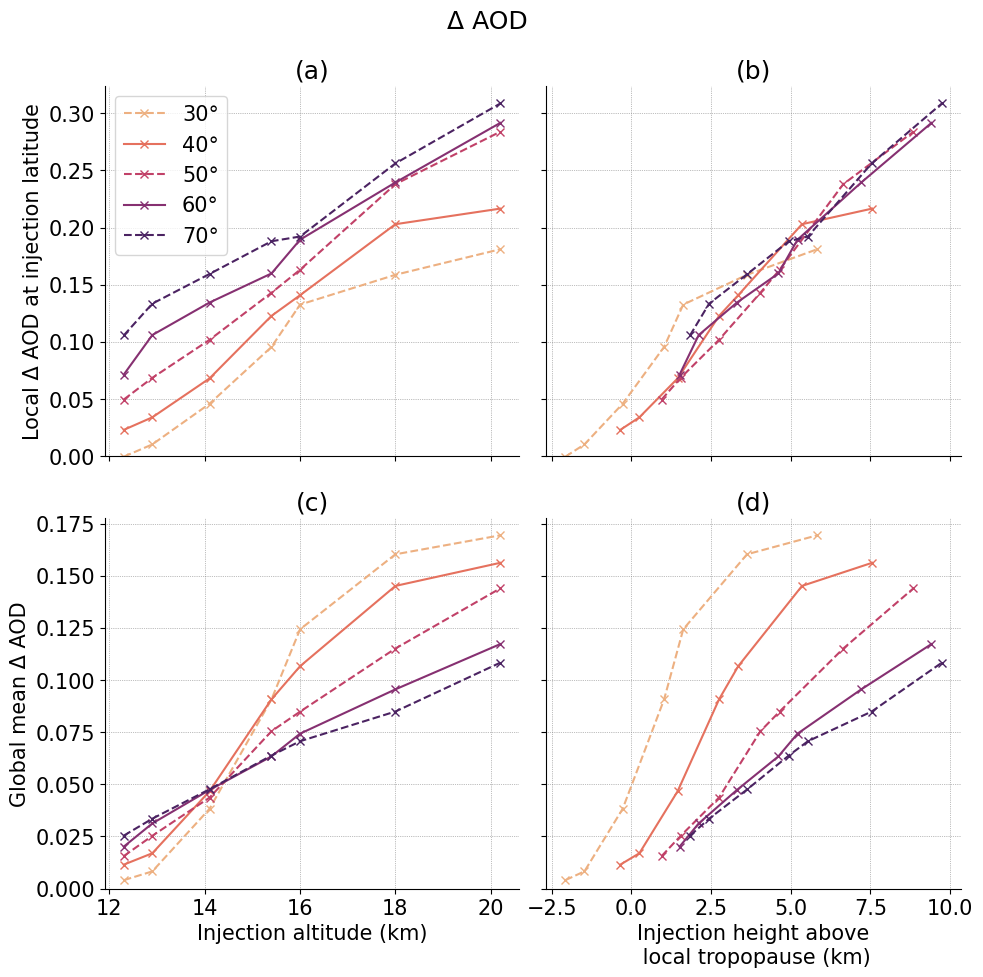

In [12]:
## global mean AOD


fig, axs = plt.subplots(figsize=(10, 10), 
                        nrows=2, ncols=2,
                        sharey='row',
                        sharex='col')

xvars = ['Injection_altitude', 'height_above_tropopause', 
         'Injection_altitude', 'height_above_tropopause']
yvars = ['delta_AOD at inj lat', 'delta_AOD at inj lat', 'delta_AOD', 'delta_AOD']

xlabels = ['Injection altitude (km)', 
           'Injection height above\n local tropopause (km)',
           'Injection altitude (km)',
           'Injection height above\n local tropopause (km)']
ylabels = ['Local \u0394 AOD at injection latitude', 
           'Local \u0394 AOD at injection latitude', 
           'Global mean \u0394 AOD',
           'Global mean \u0394 AOD']
titles = ['(a)', '(b)', '(c)', '(d)']
linestyles = ['--', 'solid', '--', 'solid', '--', 'solid']
cmap = sns.color_palette("flare", as_cmap=True)

palette = cmap(np.linspace(0, 1, len(DF['Injection_latitude'].unique())))
i=0
for ax in axs.flatten():
    j=0
    for injection_lat in DF['Injection_latitude'].unique():
        df_to_plot = DF[DF['Injection_latitude']==injection_lat]
        #ztp_height = ztp.mean(dim='month').sel(latitude=injection_lat, method='nearest').ztp.item()
        ztp_height = ztp.sel(latitude=injection_lat, method='nearest').ztp.item()
        df_to_plot['height_above_tropopause'] = df_to_plot['Injection_altitude'] - ztp_height
        
        ax.plot(df_to_plot[xvars[i]], df_to_plot[yvars[i]],
                label=str(str(injection_lat).split('.')[0]+'°'), 
                marker='x', c=palette[j], ls=linestyles[j])
        j=j+1
    if i >1:
        ax.set_xlabel(xlabels[i])
    if i == 0 or i == 2:
        ax.set_ylabel(ylabels[i])
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)
    ax.set_ylim(0,)
    ax.set_title(titles[i])
    i=i+1
axs.flatten()[0].legend()
plt.suptitle('\u0394 AOD')
plt.tight_layout()
plt.savefig('Figures/Main/Delta_AOD_combined_4panel.jpg', dpi=400)

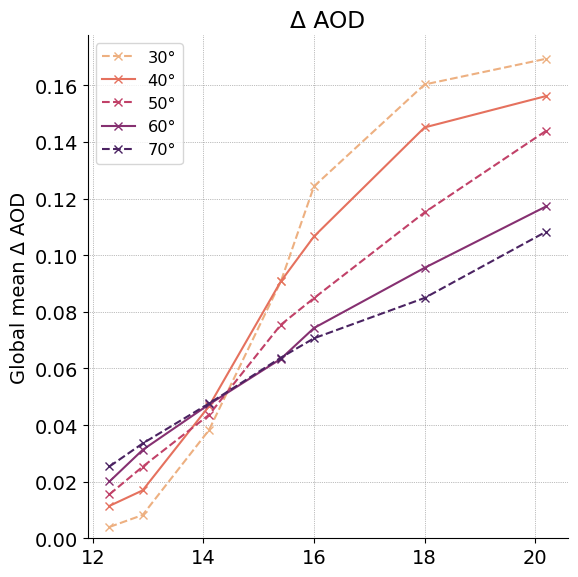

In [13]:
### also make one with just the global mean AOD (i.e. just c)

## global mean AOD
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(6, 6))

xvars = ['Injection_altitude']
yvars = ['delta_AOD']

xlabels = ['Injection altitude (km)']
ylabels = ['Global mean \u0394 AOD']
titles = ['\u0394 AOD']
linestyles = ['--', 'solid', '--', 'solid', '--', 'solid']
cmap = sns.color_palette("flare", as_cmap=True)

palette = cmap(np.linspace(0, 1, len(DF['Injection_latitude'].unique())))
i=0
j=0
for injection_lat in DF['Injection_latitude'].unique():
    df_to_plot = DF[DF['Injection_latitude']==injection_lat]
    #ztp_height = ztp.mean(dim='month').sel(latitude=injection_lat, method='nearest').ztp.item()
    ztp_height = ztp.sel(latitude=injection_lat, method='nearest').ztp.item()
    df_to_plot['height_above_tropopause'] = df_to_plot['Injection_altitude'] - ztp_height
    
    ax.plot(df_to_plot[xvars[i]], df_to_plot[yvars[i]],
            label=str(str(injection_lat).split('.')[0]+'°'), 
            marker='x', c=palette[j], ls=linestyles[j])
    j=j+1
if i >1:
    ax.set_xlabel(xlabels[i])
if i == 0 or i == 2:
    ax.set_ylabel(ylabels[i])
ax.spines[['right', 'top']].set_visible(False)
ax.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)
ax.set_ylim(0,)
ax.set_title(titles[i])
i=i+1
ax.legend(fontsize='small')
#plt.suptitle('\u0394 AOD')
plt.tight_layout()
plt.savefig('Figures/Extra/Delta_AOD_global_alt_only.jpg', dpi=350, bbox_inches='tight')

In [14]:
## get year-to-year variability in sAOD and AOD:

#AOD
path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/AERmon/od550aer/gn/latest/'
aod_ssp245_r1 = rename_cmip6(xr.open_mfdataset(path+'*.nc'))
aod_ssp245_r1 = aod_ssp245_r1.mean(dim=['x']).rename({'y':'latitude'})
weights = np.cos(np.deg2rad(aod_ssp245_r1['latitude']))
aod_ssp245_r1_ts = aod_ssp245_r1.weighted(weights).mean(dim='latitude')
aod_ssp245_r1_ts = aod_ssp245_r1_ts.sel(time=slice('2020', '2050'))
aod_ssp245_r1_ts.groupby("time.year").mean(dim="time")
AOD_y2ySTD = np.std(aod_ssp245_r1_ts.od550aer.values).item()
print(AOD_y2ySTD)

#sAOD
path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/Emon/od550aerso/gn/latest/'
aod_ssp245_r1 = rename_cmip6(xr.open_mfdataset(path+'*.nc'))
aod_ssp245_r1 = aod_ssp245_r1.mean(dim=['x']).rename({'y':'latitude'})
weights = np.cos(np.deg2rad(aod_ssp245_r1['latitude']))
aod_ssp245_r1_ts = aod_ssp245_r1.weighted(weights).mean(dim='latitude')
aod_ssp245_r1_ts = aod_ssp245_r1_ts.sel(time=slice('2020', '2050'))
aod_ssp245_r1_ts.groupby("time.year").mean(dim="time")
sAOD_y2ySTD = np.std(aod_ssp245_r1_ts.od550aerso.values).item()
print(sAOD_y2ySTD)

0.01070070434357871
0.00018814099268622047


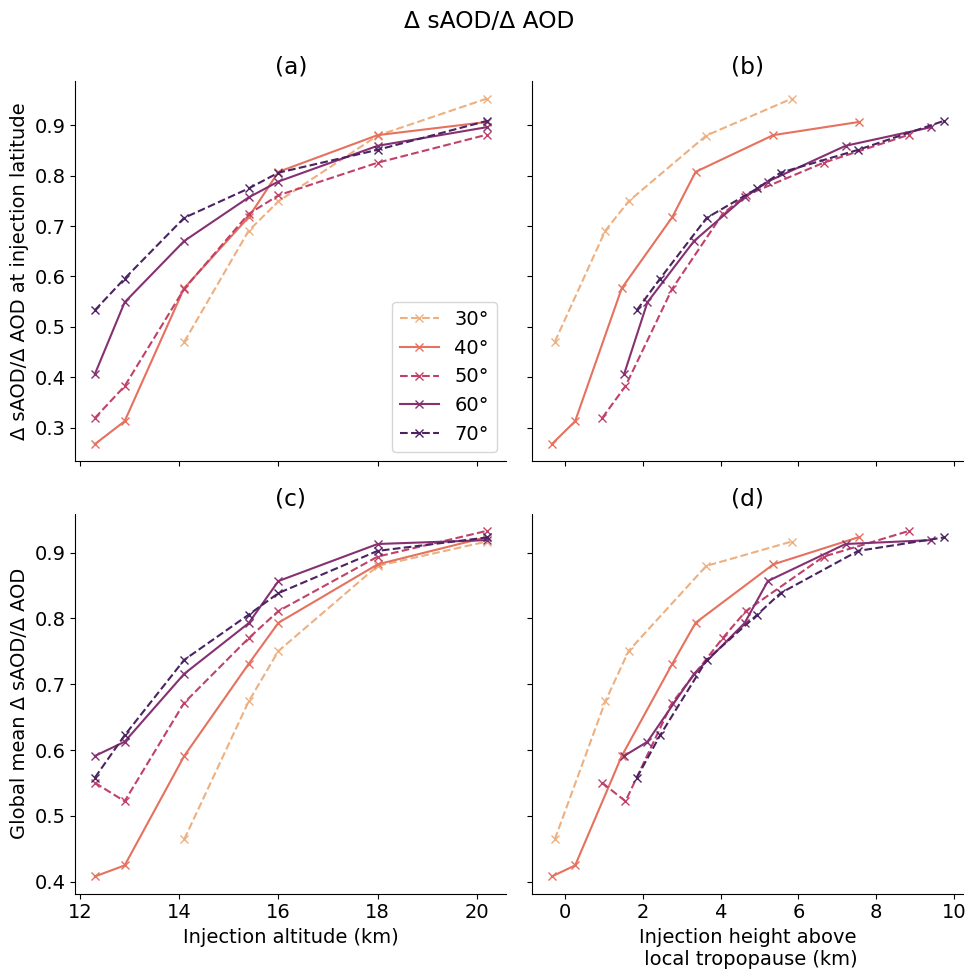

In [15]:
DF['ratio_strat_at_inj_lat'] = DF['delta_sAOD at inj lat']/DF['delta_AOD at inj lat']
DF['ratio_strat'] = DF['delta_sAOD']/DF['delta_AOD']

# don't plot ratio if either global delta is smaller than the y2y variability, as it ceases to be meaningful:
for var in ['ratio_strat_at_inj_lat', 'ratio_strat']:
    DF[var][DF['delta_AOD'] < AOD_y2ySTD] = np.nan
    DF[var][DF['delta_sAOD'] < sAOD_y2ySTD] = np.nan
    i=i+1

fig, axs = plt.subplots(figsize=(10, 10), 
                        nrows=2, ncols=2,
                        sharey='row',
                        sharex='col')

xvars = ['Injection_altitude', 'height_above_tropopause', 
         'Injection_altitude', 'height_above_tropopause']
yvars = ['ratio_strat_at_inj_lat', 'ratio_strat_at_inj_lat', 'ratio_strat', 'ratio_strat']
titles = ['(a)', '(b)', '(c)', '(d)']

xlabels = ['Injection altitude (km)', 
           'Injection height above\n local tropopause (km)',
           'Injection altitude (km)',
           'Injection height above\n local tropopause (km)']
ylabels = ['\u0394 sAOD/\u0394 AOD at injection latitude', 
           '\u0394 sAOD/\u0394 AOD at injection latitude', 
           'Global mean \u0394 sAOD/\u0394 AOD',
           'Global mean \u0394 sAOD/\u0394 AOD']
linestyles = ['--', 'solid', '--', 'solid', '--', 'solid']
cmap = sns.color_palette("flare", as_cmap=True)

palette = cmap(np.linspace(0, 1, len(DF['Injection_latitude'].unique())))
i=0
for ax in axs.flatten():
    j=0
    for injection_lat in DF['Injection_latitude'].unique():
        df_to_plot = DF[DF['Injection_latitude']==injection_lat]
        #ztp_height = ztp.mean(dim='month').sel(latitude=injection_lat, method='nearest').ztp.item()
        ztp_height = ztp.sel(latitude=injection_lat, method='nearest').ztp.item()
        df_to_plot['height_above_tropopause'] = df_to_plot['Injection_altitude'] - ztp_height
        
        ax.plot(df_to_plot[xvars[i]], df_to_plot[yvars[i]],
                label=str(str(injection_lat).split('.')[0]+'°'), 
                marker='x', c=palette[j], ls=linestyles[j])
        j=j+1
    if i >1:
        ax.set_xlabel(xlabels[i])
    if i == 0 or i == 2:
        ax.set_ylabel(ylabels[i])
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])
    i=i+1
axs.flatten()[0].legend()
plt.suptitle('\u0394 sAOD/\u0394 AOD')
plt.tight_layout()
plt.savefig('Figures/Extra/Ratio_strat_AOD_combined_4panel.jpg', dpi=400)

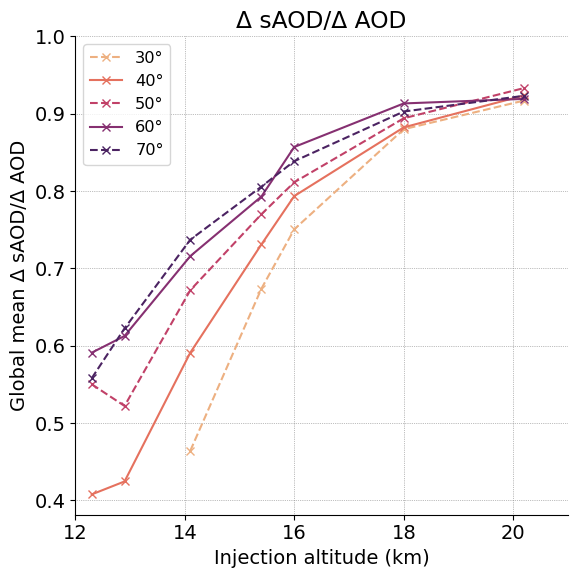

In [16]:
### also make one with just the global mean against abs altitude (i.e. just c)

matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(6, 6))

xvars = ['Injection_altitude']
yvars = ['ratio_strat']

xlabels = ['Injection altitude (km)']
ylabels = ['Global mean \u0394 sAOD/\u0394 AOD']
titles = ['\u0394 AOD']
linestyles = ['--', 'solid', '--', 'solid', '--', 'solid']
cmap = sns.color_palette("flare", as_cmap=True)

palette = cmap(np.linspace(0, 1, len(DF['Injection_latitude'].unique())))
i=0
j=0
for injection_lat in DF['Injection_latitude'].unique():
    df_to_plot = DF[DF['Injection_latitude']==injection_lat]
    #ztp_height = ztp.mean(dim='month').sel(latitude=injection_lat, method='nearest').ztp.item()
    #ztp_height = ztp.sel(latitude=injection_lat, method='nearest').ztp.item()
    #df_to_plot['height_above_tropopause'] = df_to_plot['Injection_altitude'] - ztp_height
    
    ax.plot(df_to_plot[xvars[i]], df_to_plot[yvars[i]],
            label=str(str(injection_lat).split('.')[0]+'°'), 
            marker='x', c=palette[j], ls=linestyles[j])
    j=j+1
ax.set_xlabel(xlabels[i])
ax.set_ylabel(ylabels[i])
ax.spines[['right', 'top']].set_visible(False)
ax.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)
#ax.set_ylim(0,)
ax.set_xlim(12, 21)
ax.set_ylim(None, 1)
ax.set_title('\u0394 sAOD/\u0394 AOD')
i=i+1
ax.legend(fontsize='small')
plt.tight_layout()
plt.savefig('Figures/Supp/strat_ratio_AOD_global_alt_only.jpg', dpi=350, bbox_inches='tight')

In [17]:
for run in ['u-de348', 'u-de111', 'u-de567', 'u-de369']:
    print(run_dict[run], 1-DF[DF['Run_ID']==run]['ratio_strat'].item())

[30.625, 14.1] 0.5359828428549154
[40.625, 14.1] 0.40911047148629054
[60.625, 12.9] 0.3874394087108486
[40.625, 20.2] 0.07633630105778122


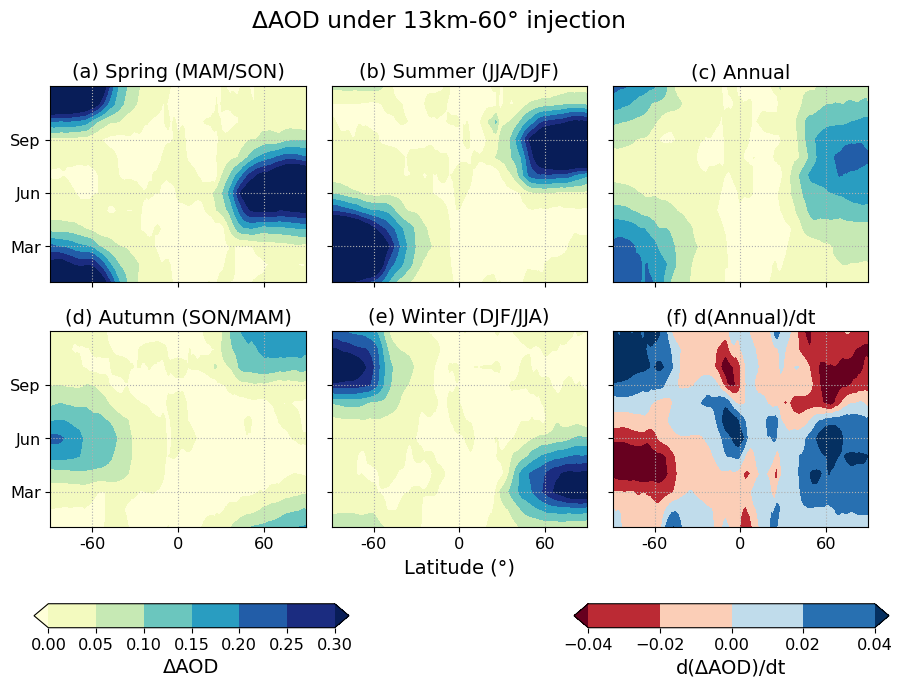

In [18]:
### also plot the zonal-seasonal variation in AOD with seasonal injection sims, for sup fig

run_dict = {
            'u-df848':[60.625, 12.9, 'Spring'],
            'u-df859':[60.625, 12.9, 'Summer'],
            'u-df931':[60.625, 12.9, 'Autumn'],
            'u-df932':[60.625, 12.9, 'Winter'],
            'u-dg051':[60.625, 12.9, 'Jan-Jun'],
            'u-dg331':[60.625, 12.9, 'Mar-Aug'],
            #'u-dg381':[30.625, 15.4, 'Mar-Aug'],
            }


# get ssp245 baseline aod:
path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/AERmon/od550aer/gn/latest/'
aod_ssp245_r1 = rename_cmip6(xr.open_mfdataset(path+'*.nc')).sel(time='2036')
aod_ssp245_r1 = aod_ssp245_r1.mean(dim=['x']).rename({'y':'latitude'})
weights = np.cos(np.deg2rad(aod_ssp245_r1['latitude']))
aod_ssp245_r1_ts = aod_ssp245_r1.weighted(weights).mean(dim='latitude')


### nice plot with seasonal and annual mean for 60° 12.9km:


fig, axs = plt.subplots(2, 3, figsize=(9, 6),
                        sharex='all', sharey='all')
i=0
for run in ['u-df848', 'u-df859', 'u-de567', 'u-df931', 'u-df932']:
    ax = axs.flatten()[i]
    ds = get_ds(run, 'AOD').mean('longitude')
    cs=ax.contourf(ds.latitude.values, ds.time.dt.month.values, 
                   ds.Total_AOD.values - aod_ssp245_r1.od550aer.values,
                   levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                   cmap='YlGnBu',
                   extend='both')
    ax.set_xticks([-60, 0, 60])
    ax.set_xticklabels(['-60', '0', '60'], fontsize='small')
    ax.set_yticks([3, 6, 9])
    ax.set_yticklabels(['Mar', 'Jun', 'Sep'], fontsize='small')
    ax.grid(ls='dotted')
    i=i+1

ax = axs.flatten()[5]
ds = get_ds('u-de567', 'AOD').mean('longitude')
csd=ax.contourf(ds.latitude.values, ds.time.dt.month.values, 30*ds.Total_AOD.differentiate('time', datetime_unit='D').values,
                   #levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                levels = [-0.04, -0.02, 0, 0.02, 0.04],
                cmap='RdBu',
                extend='both',
               colorbar=True)
ax.set_xticks([-60, 0, 60])
ax.set_xticklabels(['-60', '0', '60'], fontsize='small')
ax.set_yticks([3, 6, 9])
ax.set_yticklabels(['Mar', 'Jun', 'Sep'], fontsize='small')
ax.grid(ls='dotted')

titles = ['(a) Spring (MAM/SON)', '(b) Summer (JJA/DJF)', '(c) Annual', 
          '(d) Autumn (SON/MAM)', '(e) Winter (DJF/JJA)', '(f) d(Annual)/dt']
for i in range(6):
    axs.flatten()[i].set_title(titles[i], fontsize='medium')
axs.flatten()[4].set_xlabel('Latitude (°)')
plt.tight_layout()

cbar_ax1 = fig.add_axes([0.05, -0.05, 0.35, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='\u0394AOD')
cbar1.ax.tick_params(labelsize='small')

cbar_ax2 = fig.add_axes([0.65, -0.05, 0.35, 0.04])
cbar2 = plt.colorbar(csd, cax=cbar_ax2,orientation='horizontal', label='d(\u0394AOD)/dt')
cbar2.ax.tick_params(labelsize='small')
#
#axs.flatten()[-1].remove()
fig.suptitle('\u0394AOD under 13km-60° injection')
plt.tight_layout()
plt.savefig('Figures/Supp/Seasonal_AOD_3monthlies_60_13.jpg', dpi=300, bbox_inches='tight')
plt.show()